In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

 99% 1.51G/1.52G [00:15<00:00, 91.8MB/s]
100% 1.52G/1.52G [00:15<00:00, 102MB/s] 


In [9]:
!unzip /content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

Streaming output truncated to the last 5000 lines.
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-N

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
import splitfolders   

In [5]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

In [4]:
splitfolders.ratio("/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="./dataset",
   seed=7,
   ratio=(0.75,0.25)
)

Copying files: 12446 files [00:25, 485.56 files/s]


In [3]:
train_path = "/content/dataset/train"
test_path = "/content/dataset/val"

In [5]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  4


In [49]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 512 hidden units
model.add(Dense(512, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer
model.add(Dense(4, activation='softmax'))


In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [51]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20, # Rotate the image by up to 20 degrees
    width_shift_range=0.2, # Shift the image horizontally by up to 20% of its width
    height_shift_range=0.2, # Shift the image vertically by up to 20% of its height
    brightness_range=[0.2,1.0], # Change the brightness of the image by a factor of 0.2 to 1.0
    fill_mode='nearest' # Fill any gaps created by the above transformations with the nearest pixel value
)
test_generator = ImageDataGenerator(rescale=1./255.)

In [52]:
train_datagen = train_generator.flow_from_directory(
    train_path, 
    batch_size=100,
    target_size=(224, 224), 
    class_mode = 'categorical'
)
test_datagen = test_generator.flow_from_directory(
    test_path, 
    batch_size=100,
    target_size=(224, 224),
    class_mode = 'categorical'
)

Found 9332 images belonging to 4 classes.
Found 3114 images belonging to 4 classes.


In [53]:
hist = model.fit_generator(
        generator = train_datagen,
        epochs=10
        ,
        validation_data = test_datagen)

Epoch 1/10
94/94 [==============================] - 225s 2s/step - loss: 1.2044 - accuracy: 0.5362 - val_loss: 1.1235 - val_accuracy: 0.6349
Epoch 2/10
94/94 [==============================] - 221s 2s/step - loss: 0.9617 - accuracy: 0.6437 - val_loss: 0.8842 - val_accuracy: 0.6840
Epoch 3/10
94/94 [==============================] - 222s 2s/step - loss: 0.9262 - accuracy: 0.6572 - val_loss: 0.8481 - val_accuracy: 0.6824
Epoch 4/10
94/94 [==============================] - 222s 2s/step - loss: 0.8815 - accuracy: 0.6666 - val_loss: 0.8013 - val_accuracy: 0.6808
Epoch 5/10
94/94 [==============================] - 217s 2s/step - loss: 0.8575 - accuracy: 0.6689 - val_loss: 0.7487 - val_accuracy: 0.6908
Epoch 6/10
94/94 [==============================] - 219s 2s/step - loss: 0.8100 - accuracy: 0.6860 - val_loss: 0.7810 - val_accuracy: 0.6814
Epoch 7/10
94/94 [==============================] - 232s 2s/step - loss: 0.7691 - accuracy: 0.6988 - val_loss: 1.1129 - val_accuracy: 0.6384
Epoch 8/10
94

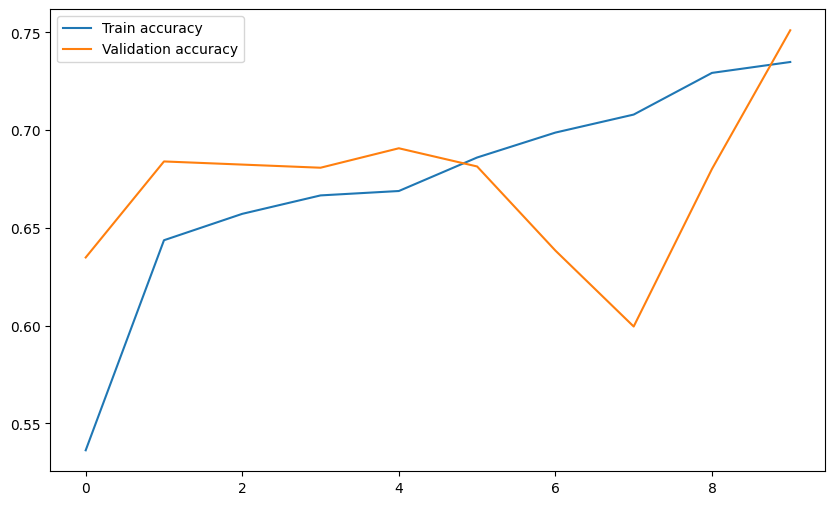

In [54]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

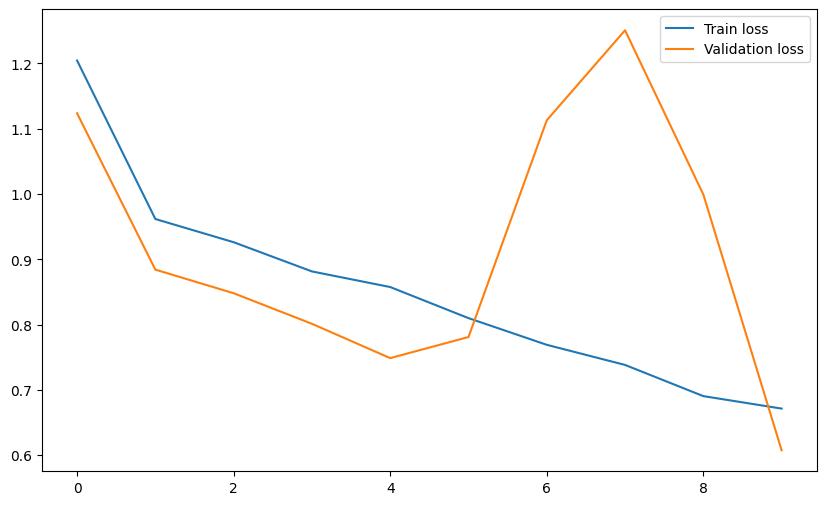

In [55]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

# Pre-Trained Models

## VGG16

In [63]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

rmodel = Model(inputs=base_model.input, outputs=predictions)

rmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rmodel.fit(train_datagen, epochs=5, validation_data=test_datagen)

Epoch 1/5
94/94 [==============================] - 134s 1s/step - loss: 1.1530 - accuracy: 0.5859 - val_loss: 1.2390 - val_accuracy: 0.4082
Epoch 2/5
94/94 [==============================] - 123s 1s/step - loss: 0.5665 - accuracy: 0.7905 - val_loss: 1.2043 - val_accuracy: 0.4730
Epoch 3/5
94/94 [==============================] - 132s 1s/step - loss: 0.3942 - accuracy: 0.8547 - val_loss: 0.4983 - val_accuracy: 0.8732
Epoch 4/5
94/94 [==============================] - 121s 1s/step - loss: 0.3020 - accuracy: 0.8929 - val_loss: 0.6043 - val_accuracy: 0.7669
Epoch 5/5
94/94 [==============================] - 131s 1s/step - loss: 0.2297 - accuracy: 0.9231 - val_loss: 0.4795 - val_accuracy: 0.8112


In [64]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

resmodel = Model(inputs=base_model.input, outputs=predictions)

resmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resmodel.fit(train_datagen, epochs=5, validation_data=test_datagen)

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/5
94/94 [==============================] - 129s 1s/step - loss: 1.1890 - accuracy: 0.5813 - val_loss: 1.3130 - val_accuracy: 0.4644
Epoch 2/5
94/94 [==============================] - 117s 1s/step - loss: 0.6473 - accuracy: 0.7539 - val_loss: 0.6862 - val_accuracy: 0.8118
Epoch 3/5
94/94 [==============================] - 117s 1s/step - loss: 0.4825 - accuracy: 0.8114 - val_loss: 0.7207 - val_accuracy: 0.6773
Epoch 4/5
94/94 [==============================] - 117s 1s/step - loss: 0.4012 - accuracy: 0.8463 - val_loss: 0.5212 - val_accuracy: 0.7897
Epoch 5/5
94/94 [==============================] - 128s 1s/step - loss: 0.3182 - accuracy: 0.8806 - val_loss: 0.6114 - val_accuracy: 0.7274


In [65]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

imodel = Model(inputs=base_model.input, outputs=predictions)

imodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
imodel.fit(train_datagen, epochs=5, validation_data=test_datagen)

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/5
94/94 [==============================] - 126s 1s/step - loss: 1.0843 - accuracy: 0.6139 - val_loss: 0.5495 - val_accuracy: 0.7771
Epoch 2/5
94/94 [==============================] - 124s 1s/step - loss: 0.5051 - accuracy: 0.8134 - val_loss: 0.2255 - val_accuracy: 0.9149
Epoch 3/5
94/94 [==============================] - 110s 1s/step - loss: 0.3281 - accuracy: 0.8815 - val_loss: 0.1587 - val_accuracy: 0.9399
Epoch 4/5
94/94 [==============================] - 124s 1s/step - loss: 0.2475 - accuracy: 0.9099 - val_loss: 0.1238 - val_accuracy: 0.9566
Epoch 5/5
94/94 [==============================] - 110s 1s/step - loss: 0.1899 - accuracy: 0.9330 - val_loss: 0.1067 - val_accuracy: 0.9576
